# Lecture 4: Heat Pump Data

## Overview

In this notebook, we examine the behavior of one heat pump using self-monitored data. 

## Set up

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting figures default
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (10,3)

### Load data

Load the data (change the `path` variable) and print summary statistics.

In [2]:
path = r'C:\Users\ucbva19\Git projects\BENV0092\data processed\heat_pump_operational_data'

# load daily aggregate data
daily_data_df = pd.read_csv(f'{path}\\daily_processed_energy_data_Oct_24_to_Dec_25.csv', index_col = 0, parse_dates= True)

print(display(daily_data_df))
print(daily_data_df.describe())

#we've now got daily electricity input and heat output, split into two different end uses of heating and hot water, in Wh.
#note that "DHW" means Domestic Hot Water

assert(daily_data_df.isna().sum().all() == 0)

,Elec_SH,Elec_DHW,Heat_SH,Heat_DHW,OutdoorTemperature,Trial_indicator
DateTime,,,,,,
2024-10-03,4.8428,1.2250,24.9181,3.0301,12.366667,0
2024-10-04,6.3014,1.1440,30.2861,2.8506,11.025000,0
2024-10-05,4.5577,1.6802,23.7835,4.2936,12.087500,0
2024-10-06,3.2108,2.3105,18.0156,5.8544,13.450000,0
2024-10-07,2.4304,1.7152,13.4556,4.6369,14.820833,0
...,...,...,...,...,...,...
2025-12-27,19.0518,7.3532,71.5538,15.7608,4.750000,1
2025-12-28,12.4907,3.9525,60.6511,8.3645,6.475000,1
2025-12-29,16.4564,6.7472,64.0209,14.4975,5.687500,1


None
          Elec_SH    Elec_DHW     Heat_SH    Heat_DHW  OutdoorTemperature  \
count  455.000000  455.000000  455.000000  455.000000          455.000000   
mean     6.744407    2.426265   29.020679    5.544078           12.242766   
std      7.203566    1.801642   27.501460    3.941894            5.662445   
min      0.157100    0.000000    0.000000    0.000000           -1.237500   
25%      0.173600    1.203400    0.000000    2.909700            8.014583   
50%      4.928400    2.359600   24.388700    5.578900           11.979167   
75%     10.941500    3.487500   51.080250    7.875700           16.150000   
max     36.883300    8.666900  105.264900   19.552300           27.516667   

       Trial_indicator  
count       455.000000  
mean          0.145055  
std           0.352544  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000  


### COP estimation

Next, we estimate the daily and annual coefficient of performance (COP) and examine its values before and during the demand response trial period.

count    455.000000
mean       3.041613
std        1.547169
min        0.000000
25%        2.216071
50%        3.746454
75%        4.162629
max        5.581542
Name: COP, dtype: float64
Annual Elec, kWh:  4172.6555
Annual Heat, kWh:  15726.9643
Annual COP: 3.769054095167933


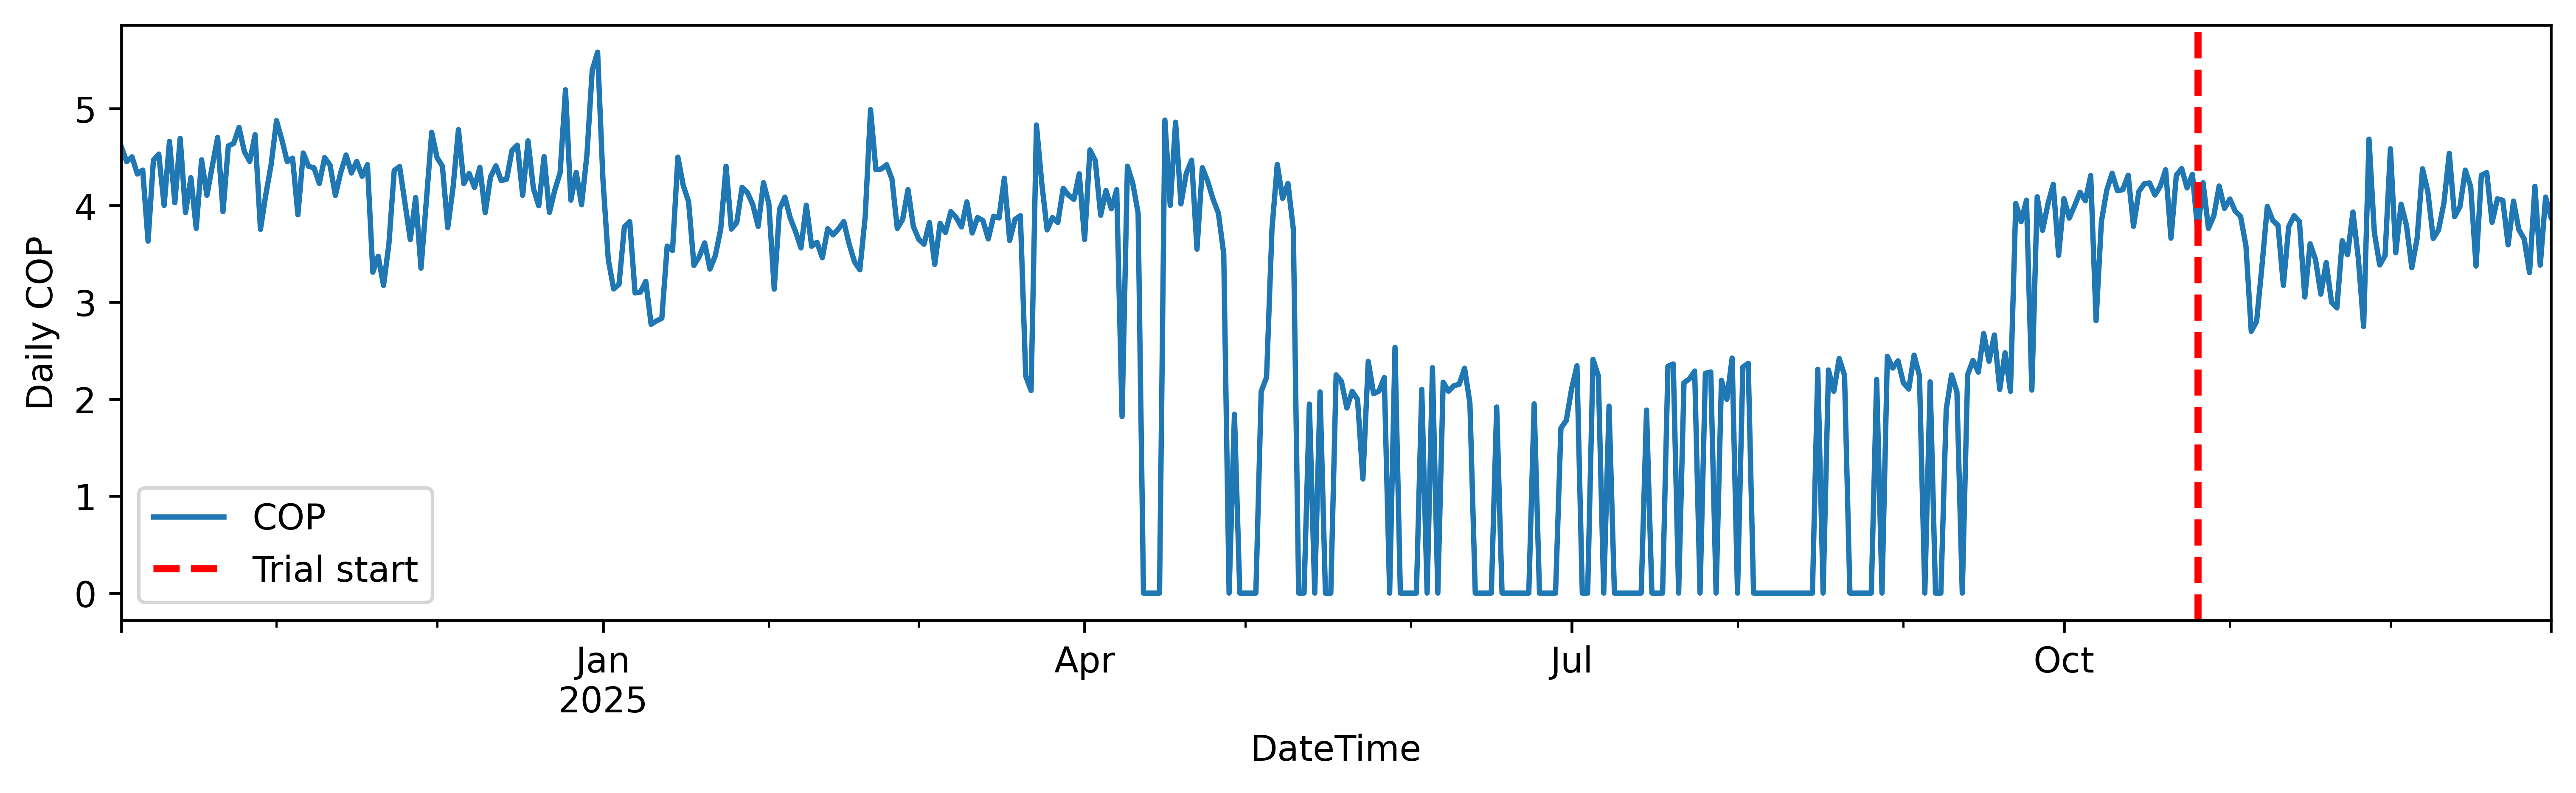

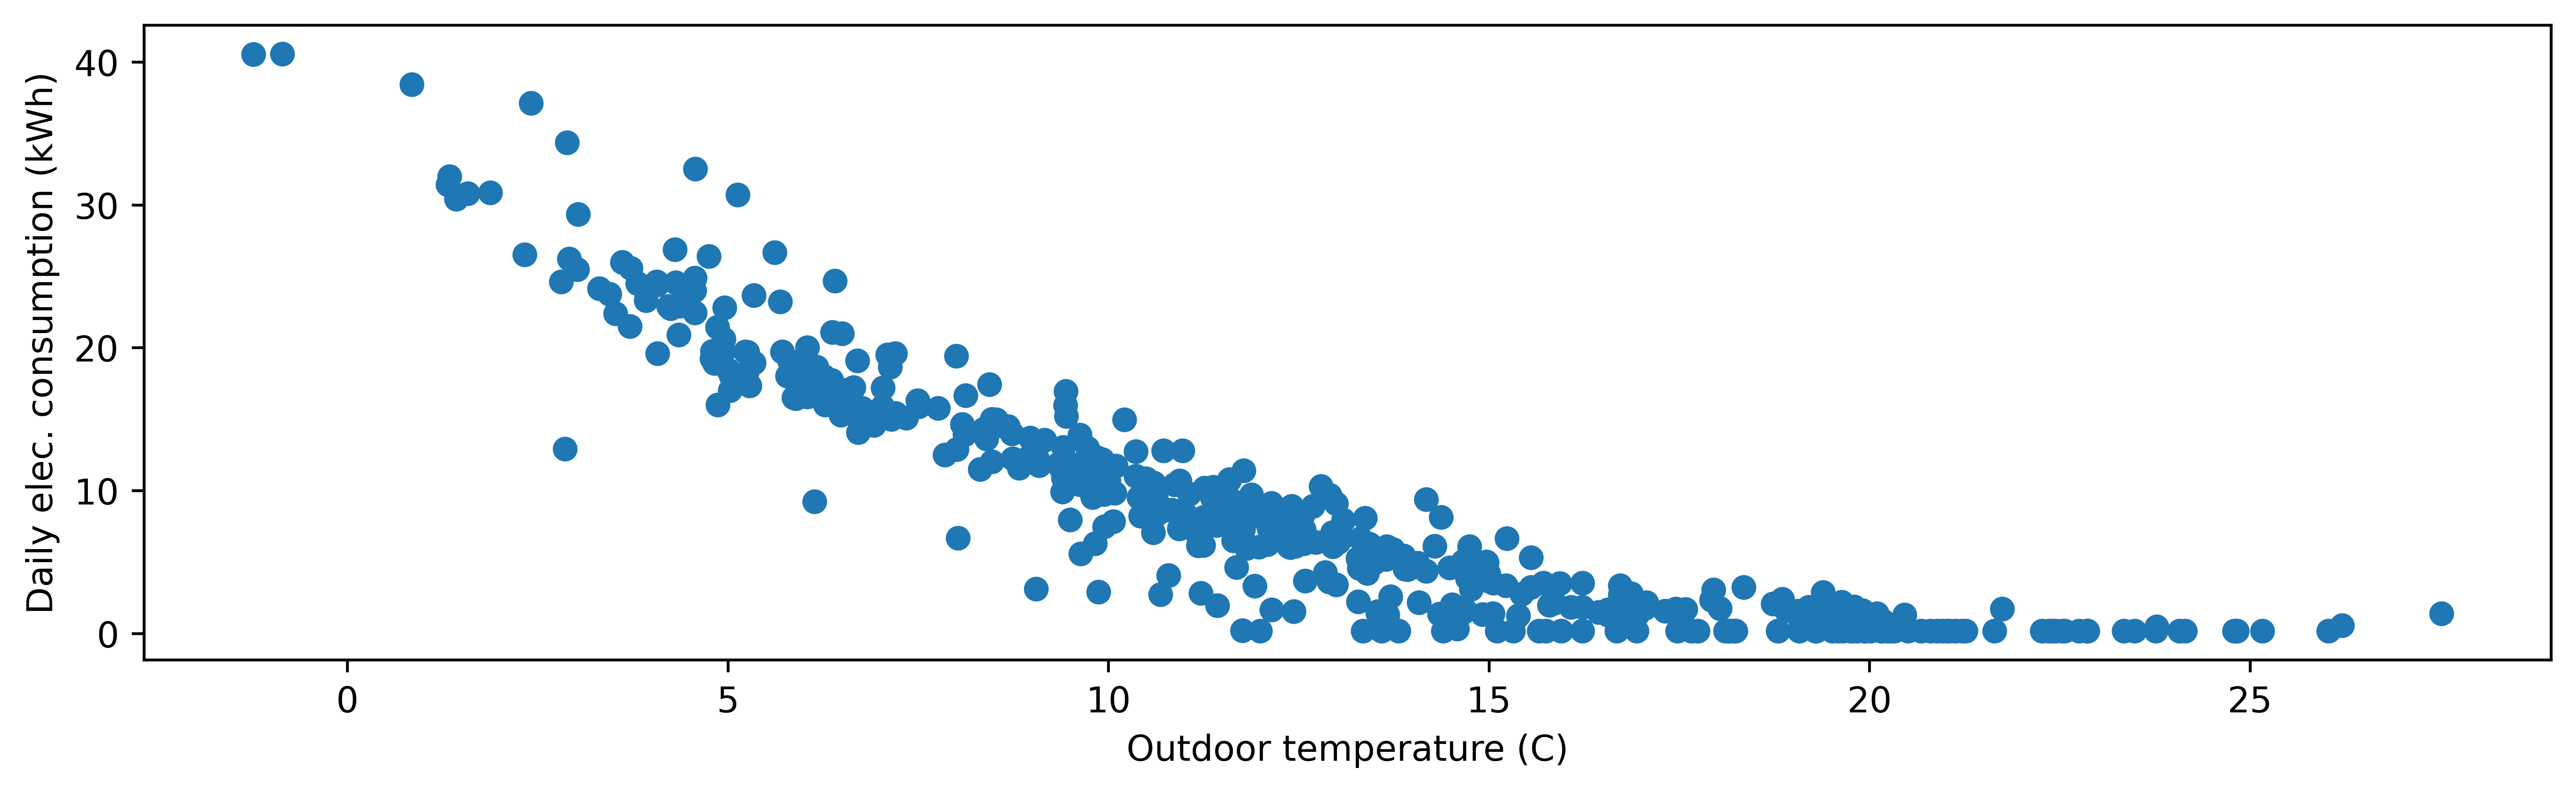

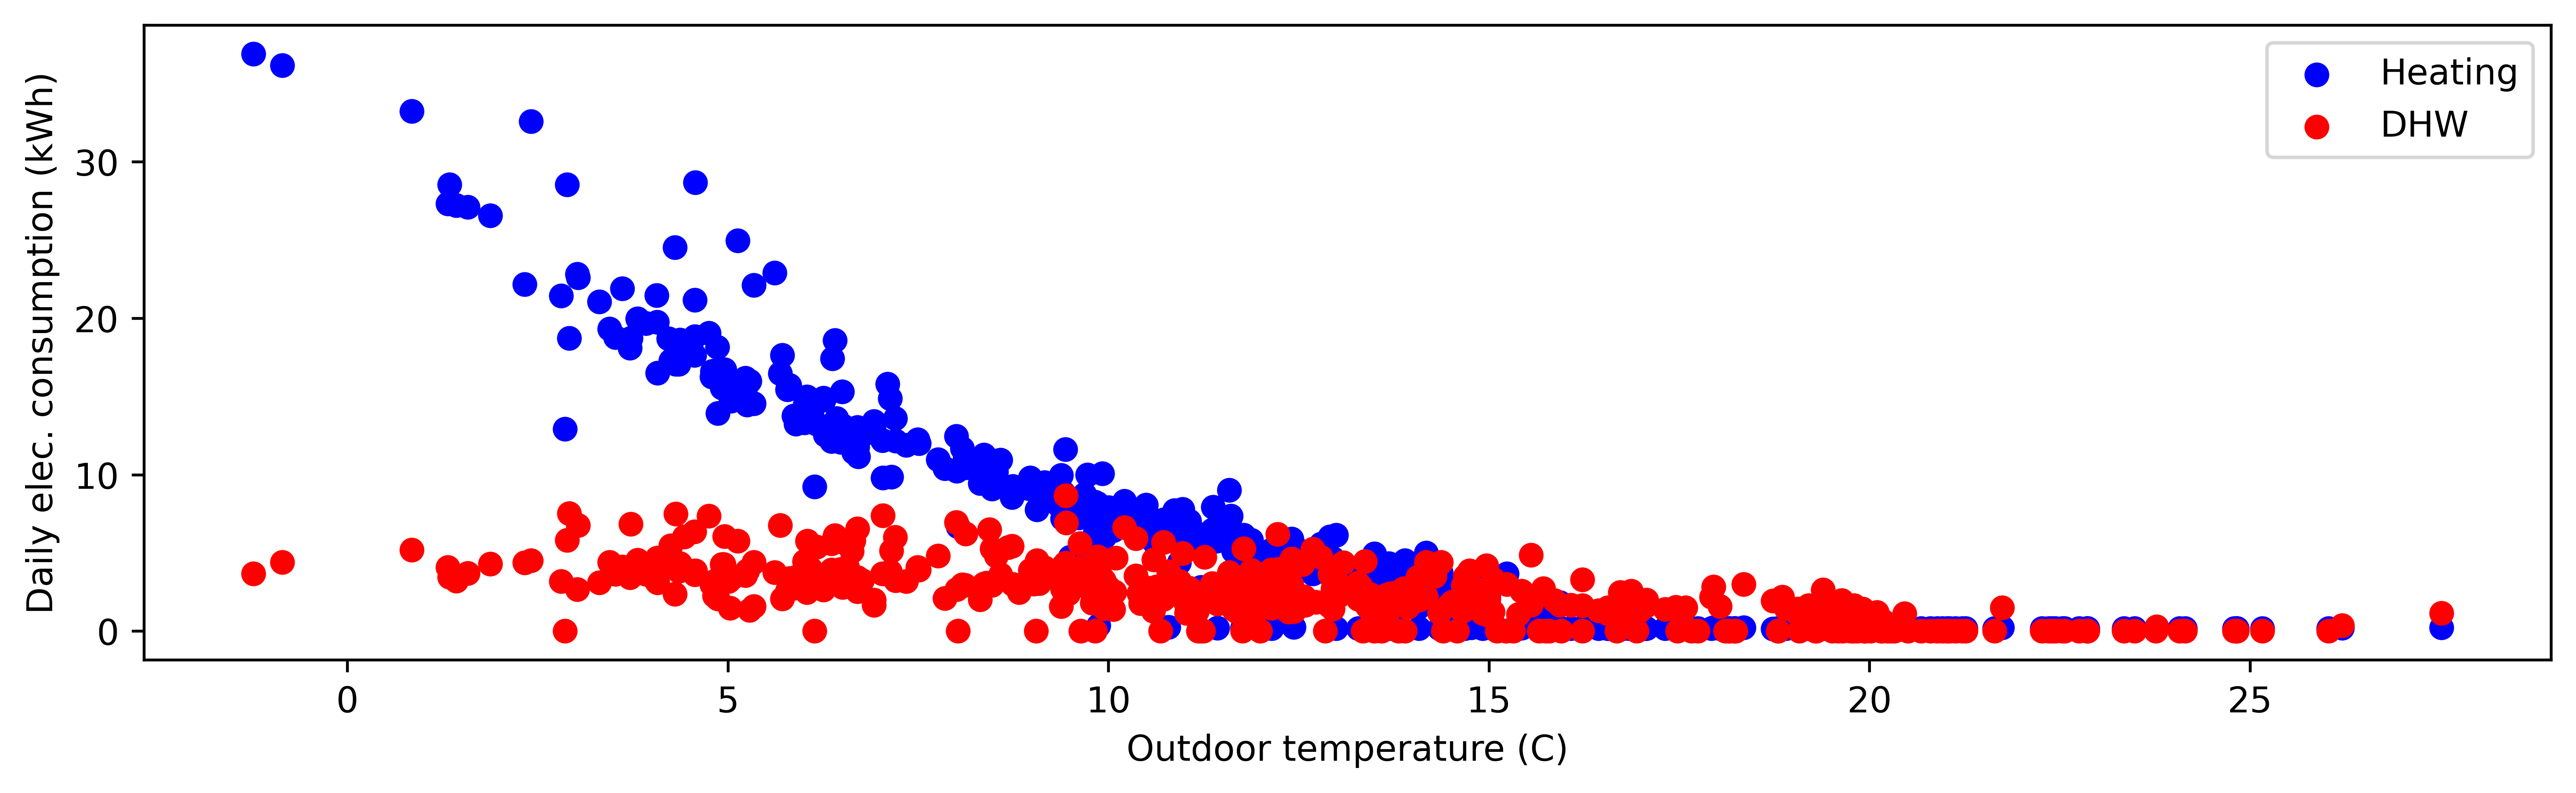

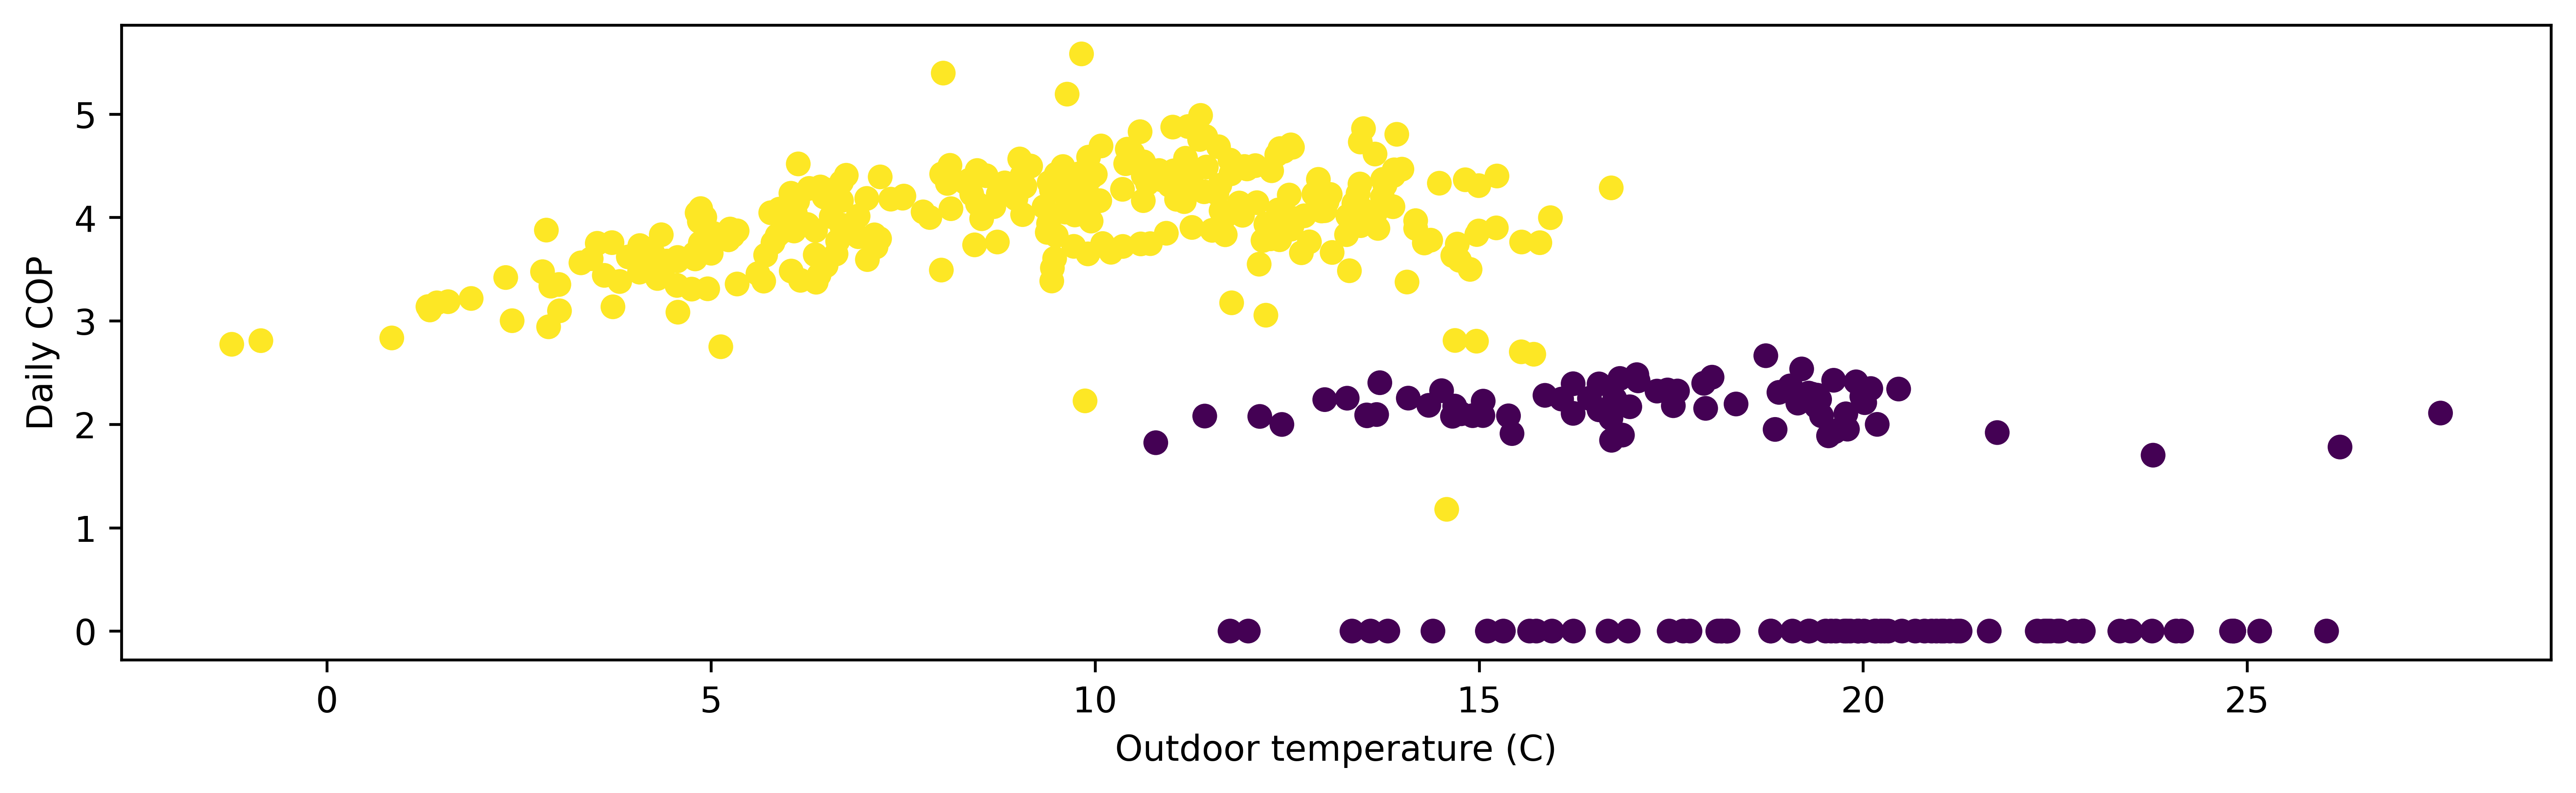

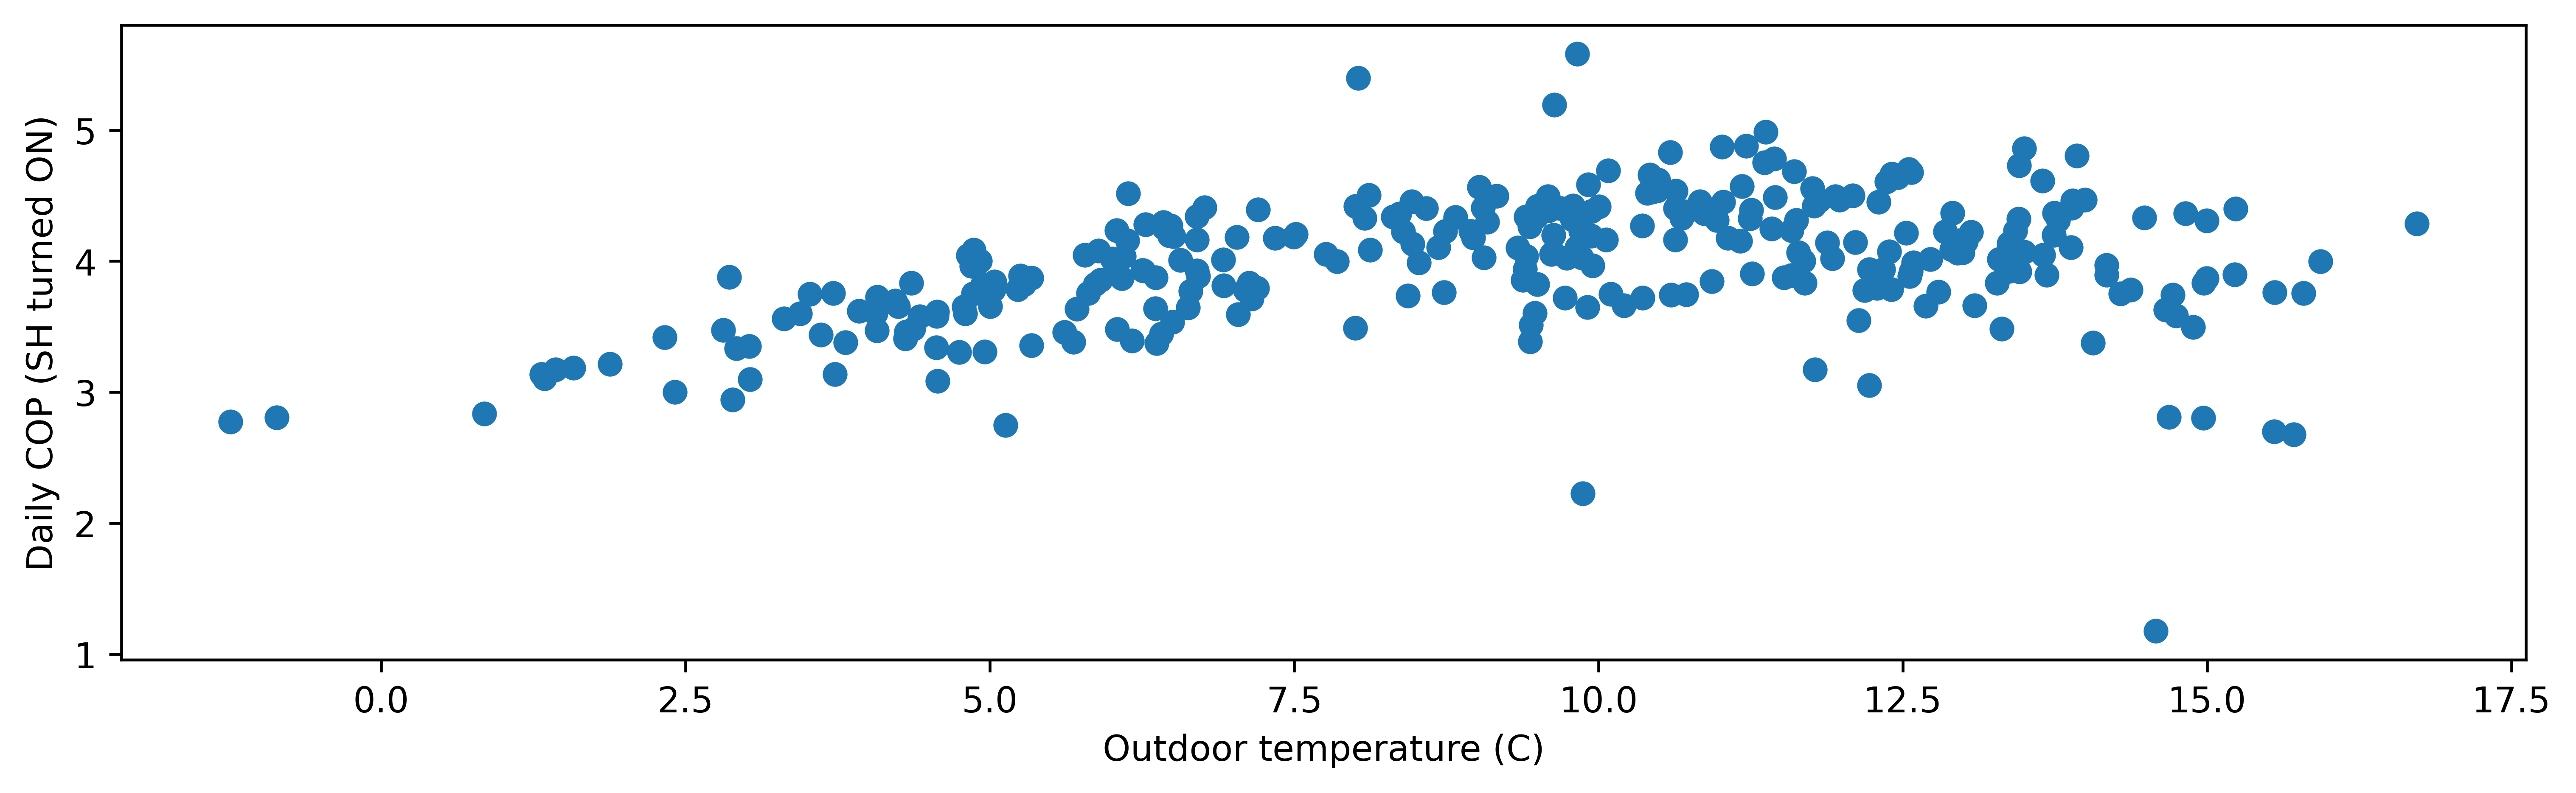

In [3]:
daily_data_df['Elec_total'] = daily_data_df['Elec_SH'] + daily_data_df['Elec_DHW']
daily_data_df['Heat_total'] = daily_data_df['Heat_SH'] + daily_data_df['Heat_DHW']

# Daily COP
daily_data_df['COP'] = daily_data_df['Heat_total']/daily_data_df['Elec_total']

print(daily_data_df['COP'].describe())
    
### Annual calculations (energy input, heat output, COP)
print('Annual Elec, kWh: ', daily_data_df['Elec_total'].sum())
print('Annual Heat, kWh: ', daily_data_df['Heat_total'].sum())
print('Annual COP:', daily_data_df['Heat_total'].sum()/daily_data_df['Elec_total'].sum())

#### Daily energy use and COP, effect of outdoor temperature 
fig, ax = plt.subplots()
daily_data_df['COP'].plot(ylabel = 'Daily COP', ax=ax)
ax.axvline(pd.to_datetime('2025-10-26'), color='r', linestyle='--', lw=2, label = 'Trial start')
plt.legend()
plt.show()

plt.figure()
plt.scatter(daily_data_df['OutdoorTemperature'], daily_data_df['Elec_total'])
plt.xlabel('Outdoor temperature (C)')
plt.ylabel('Daily elec. consumption (kWh)')
plt.show()

plt.figure()
plt.scatter(daily_data_df['OutdoorTemperature'], daily_data_df['Elec_SH'],c='blue',label='Heating')
plt.scatter(daily_data_df['OutdoorTemperature'], daily_data_df['Elec_DHW'], c='red', label='DHW')
plt.xlabel('Outdoor temperature (C)')
plt.ylabel('Daily elec. consumption (kWh)')
plt.legend()
plt.show()

#daily COP and outdoor temperature
daily_data_df['SH_on'] = daily_data_df['Elec_SH'] > 0.3
# df['SH_and_DHW_on'] = (df['Elec_SH'] > 0.3)*(df['Elec_DHW'] > 0.1)

plt.figure()
plt.scatter(daily_data_df['OutdoorTemperature'], daily_data_df['COP'], c = daily_data_df['SH_on'])
plt.xlabel('Outdoor temperature (C)')
plt.ylabel('Daily COP')
plt.show()

# Plot COP when space heating is on
plt.figure()
plt.scatter(daily_data_df['OutdoorTemperature'][daily_data_df['SH_on']], daily_data_df['COP'][daily_data_df['SH_on']])
plt.xlabel('Outdoor temperature (C)')
plt.ylabel('Daily COP (SH turned ON)')
plt.show()

## Time-of-use Trial

Next, import self-monitored hourly data from the heat pump. 
- Estimate and visualize average hourly profiles for indoor temperature setpoints and electricity consumption, before and during the trial.
- Create scatterplots of temperature vs COP and daily electricity consumption before and during the trial.
- To ensure valid counterfactuals, consider days with low temperatures before the trial commences.

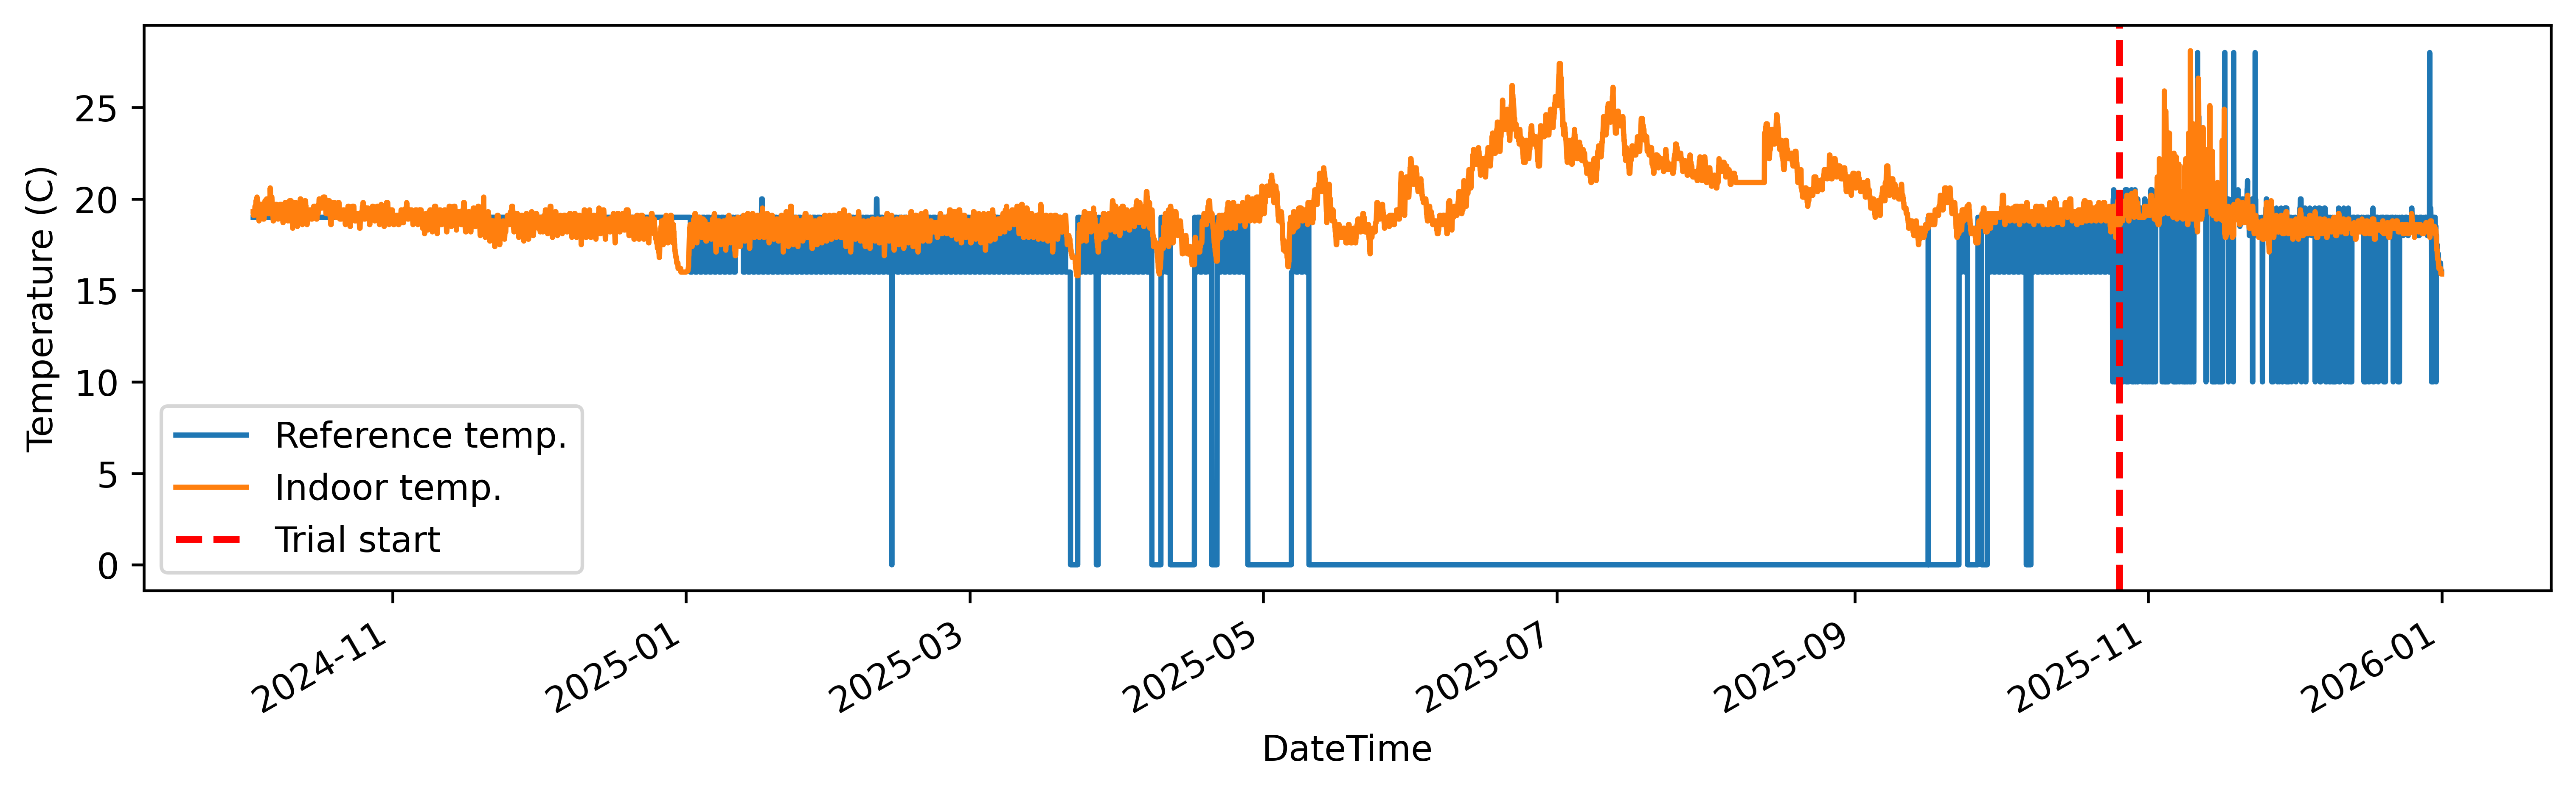

C:\Users\ucbva19\AppData\Local\Temp\ipykernel_8520\481697091.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].groupby([zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].index.hour ]).mean()['RoomTemperatureSetpoint'],
C:\Users\ucbva19\AppData\Local\Temp\ipykernel_8520\481697091.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].groupby([zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].index.hour ]).mean()['RoomTemperatureSetpoint'],


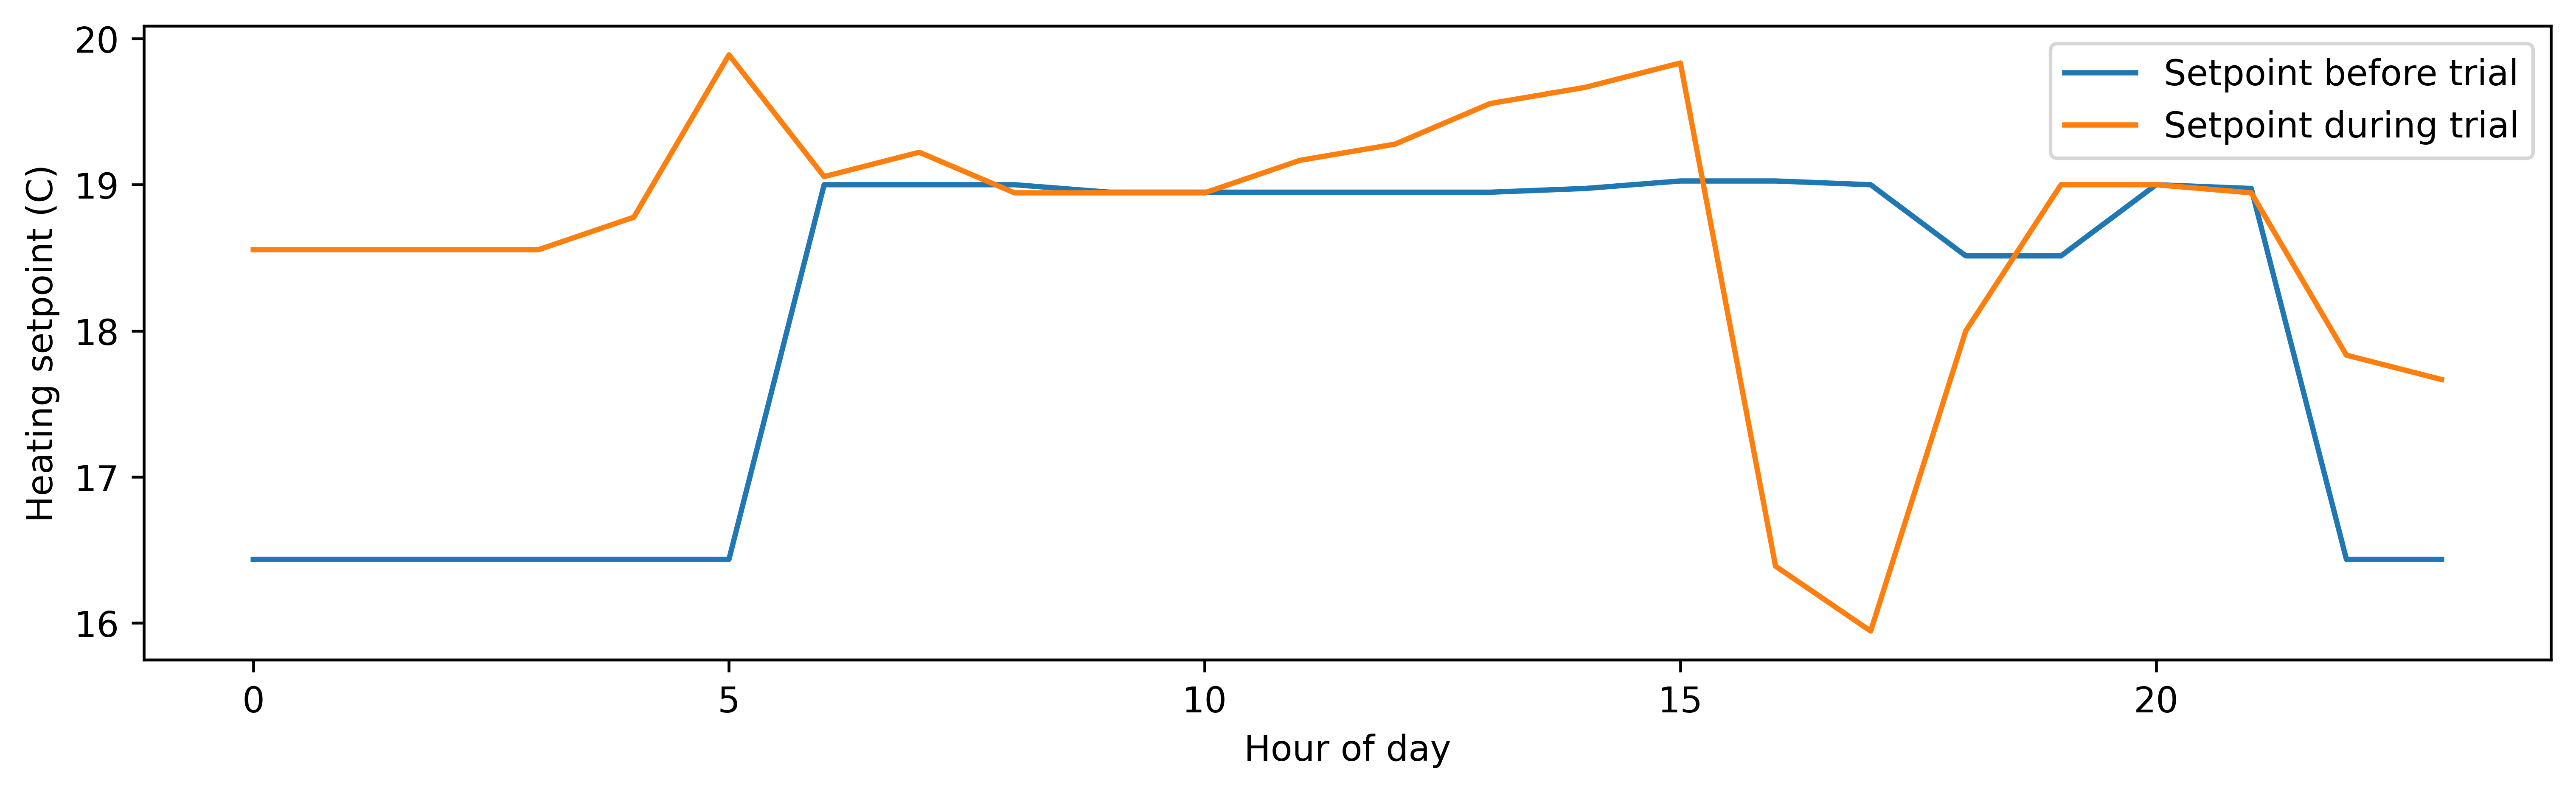

C:\Users\ucbva19\AppData\Local\Temp\ipykernel_8520\481697091.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].groupby([zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].index.hour ]).mean()['CurrentRoomTemperature'],
C:\Users\ucbva19\AppData\Local\Temp\ipykernel_8520\481697091.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].groupby([zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].index.hour ]).mean()['CurrentRoomTemperature'],


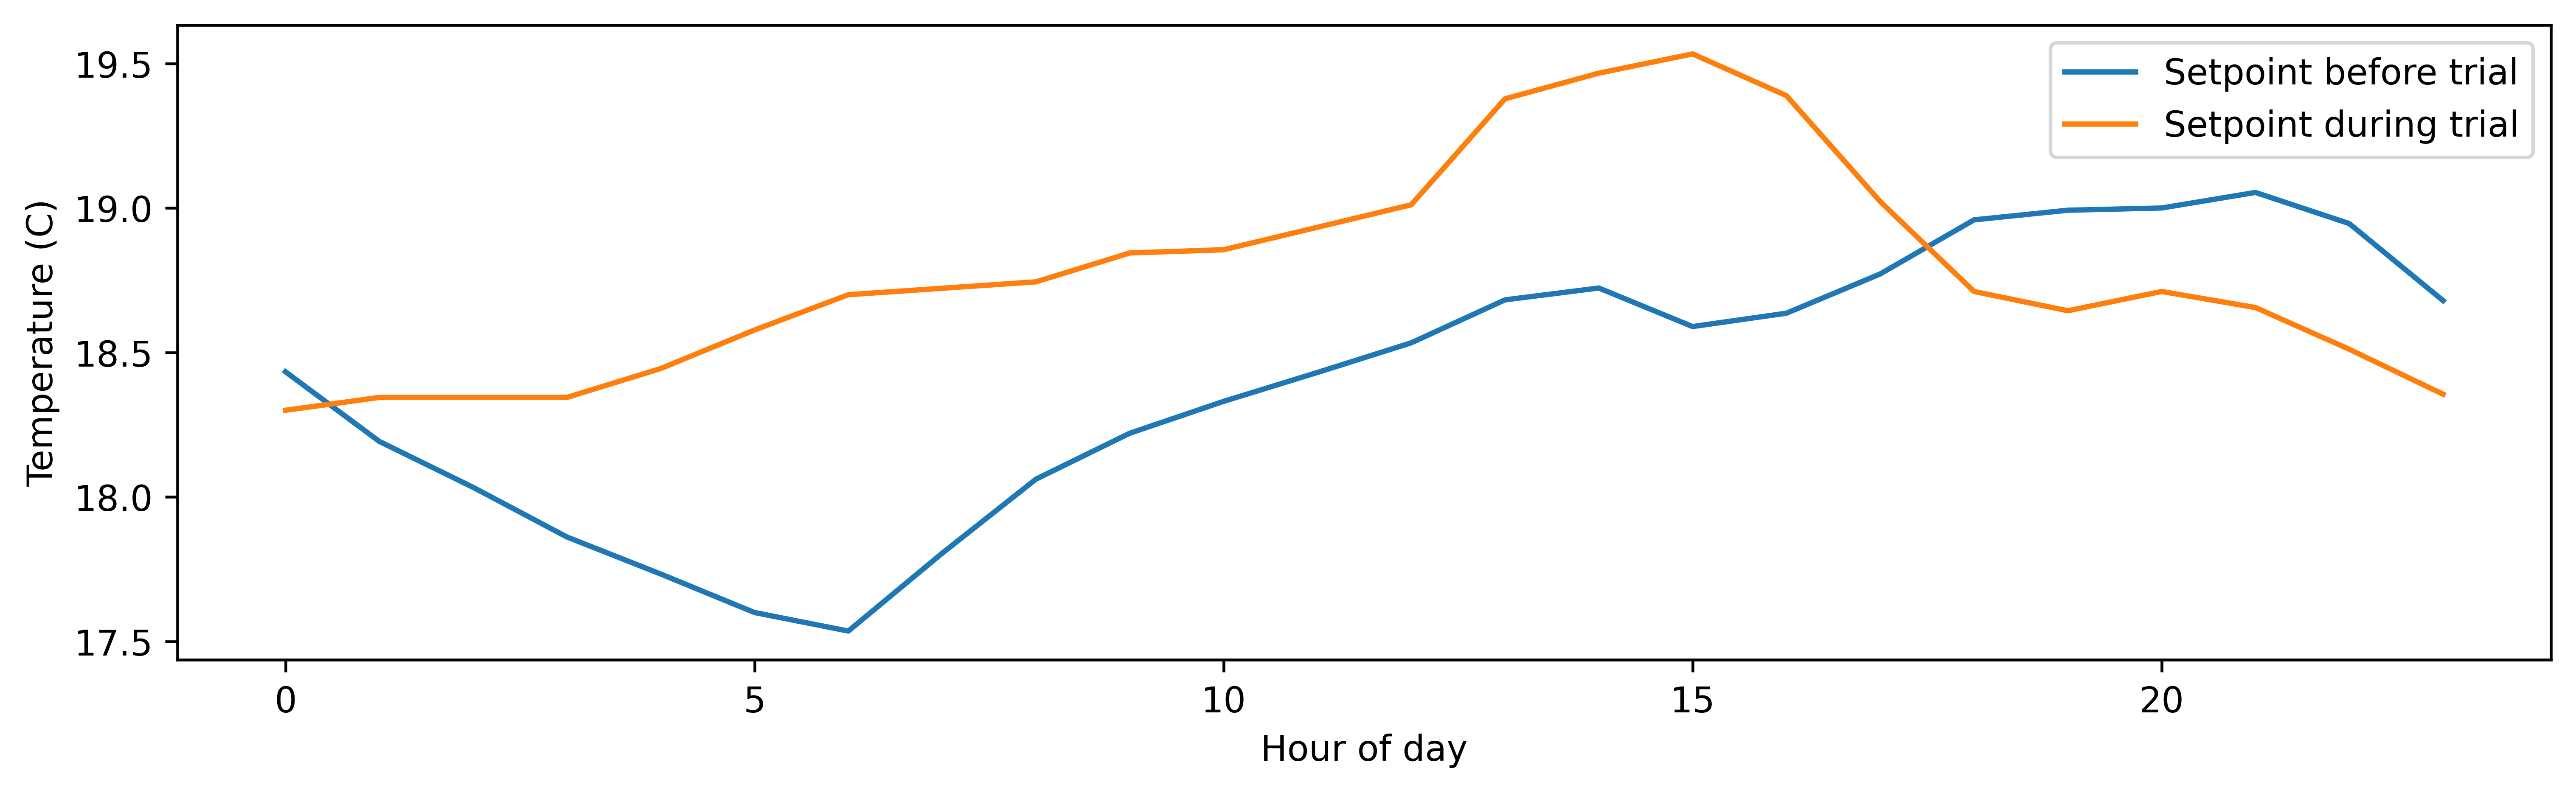

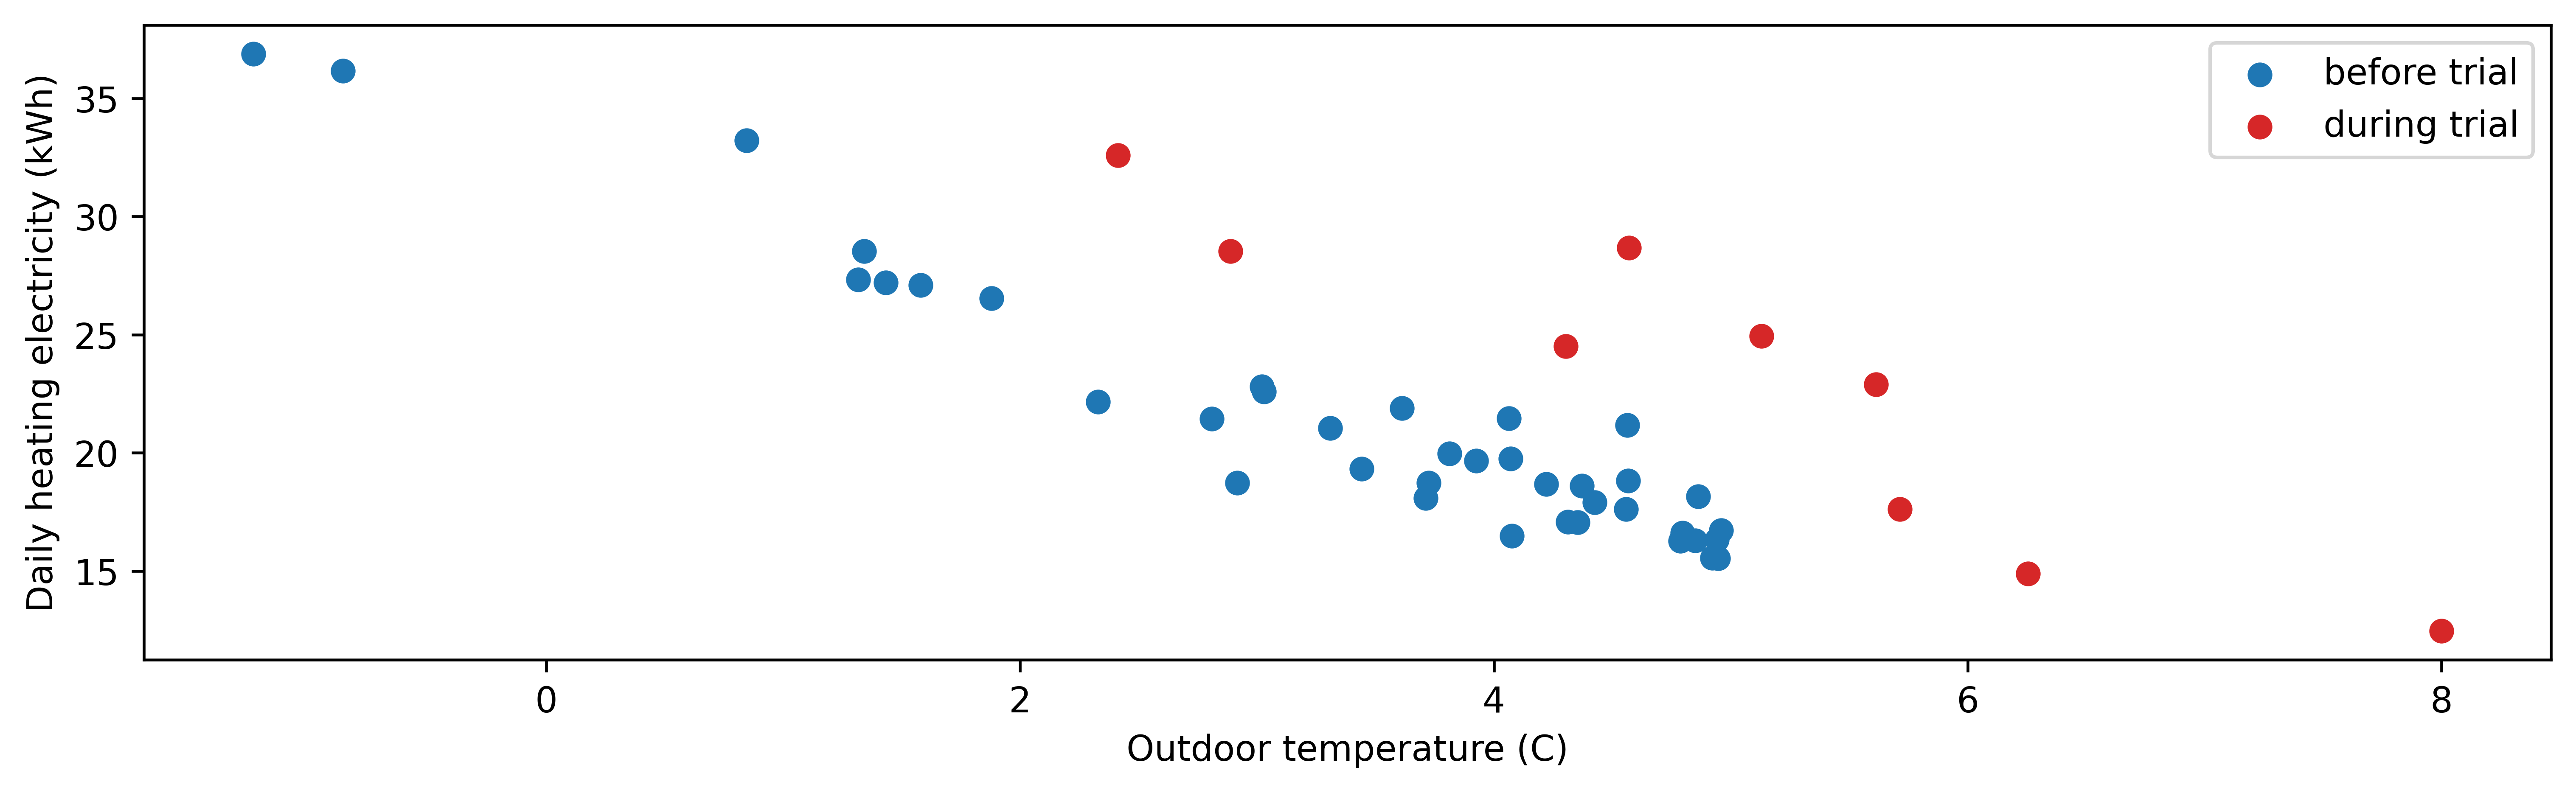

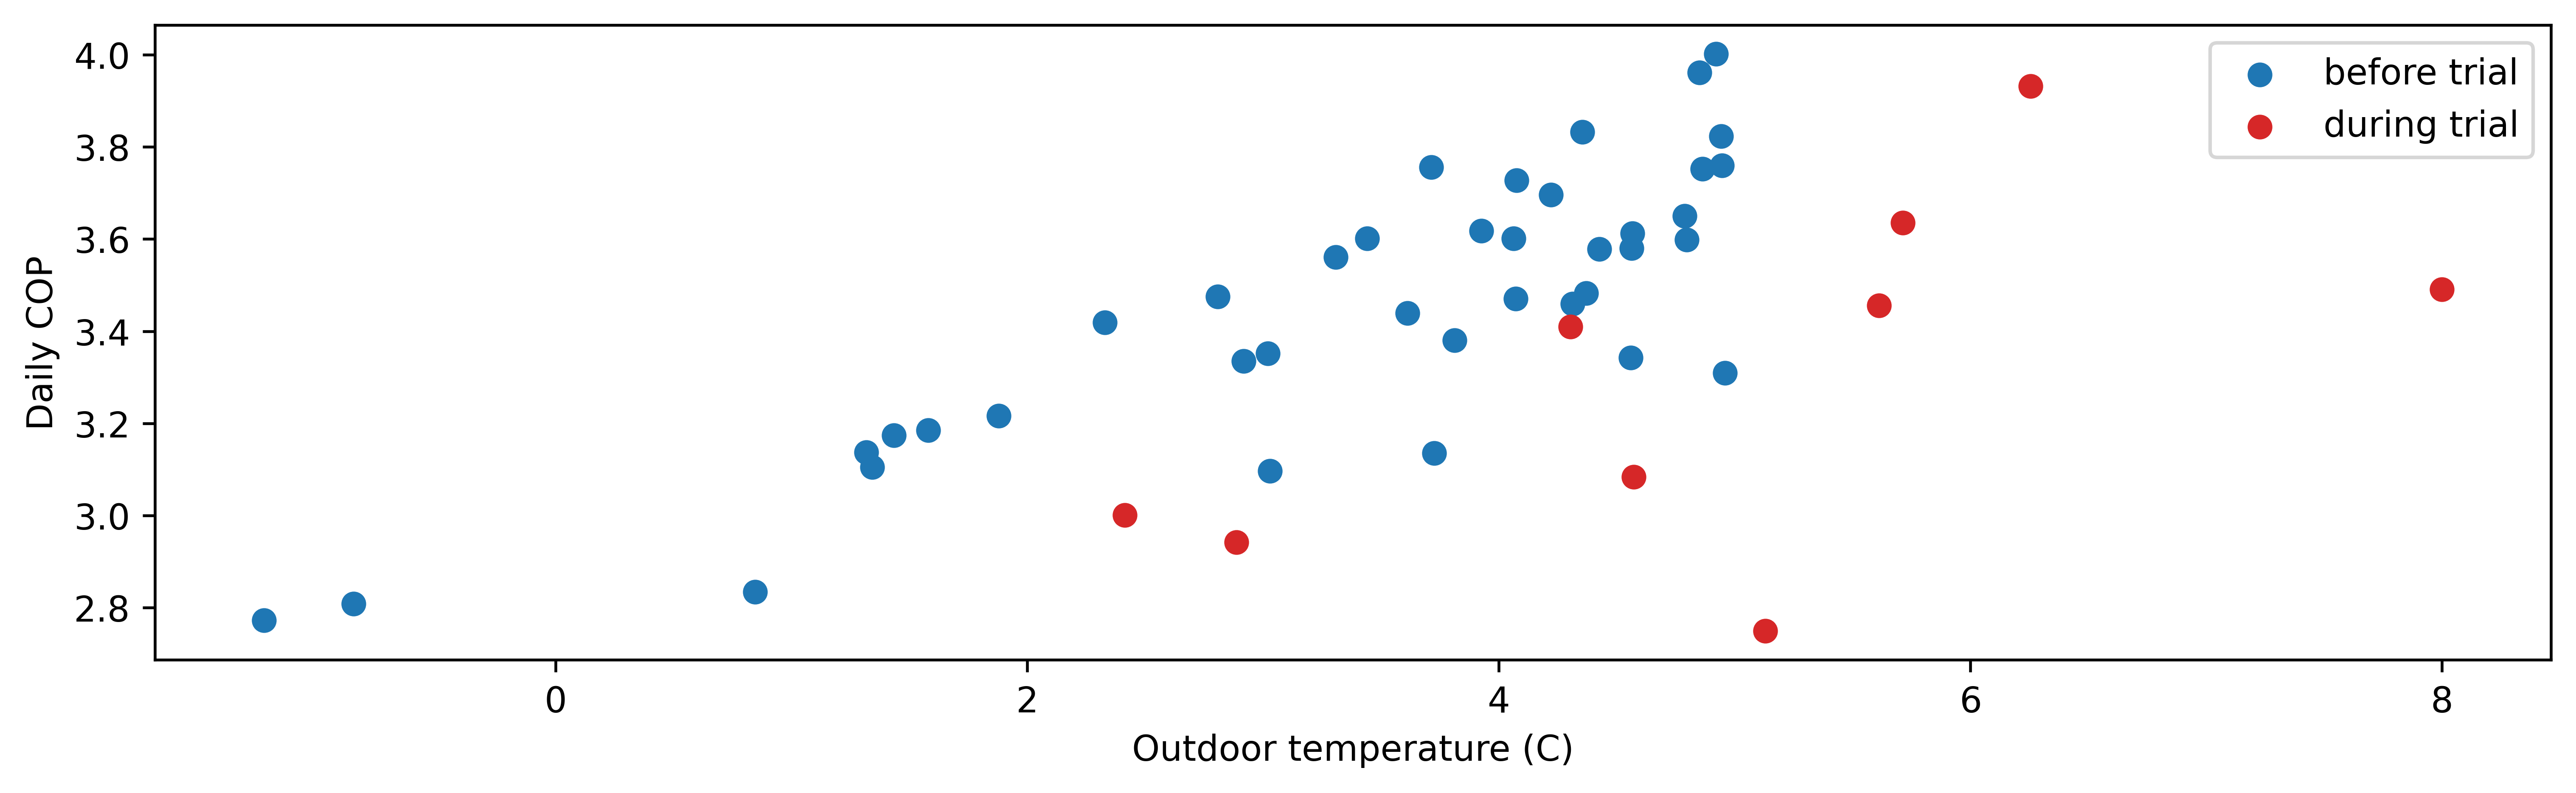

In [6]:
# first we need to import some more self-monitored data from the heat pump. We have indoor temperature, and room temperature setpoint
zone_data_df = pd.read_csv(f'{path}\\processed_zone_0_data_Oct_24_to_Dec_25.csv', index_col = 0, parse_dates=True)


# Hourly average indoor and reference temperature before and after trial
fig, ax = plt.subplots()
zone_data_df.RoomTemperatureSetpoint.plot(ax=ax, color = 'tab:blue', label = 'Reference temp.')
zone_data_df.CurrentRoomTemperature.plot(ax=ax, color = 'tab:orange', label = 'Indoor temp.')
ax.axvline(pd.to_datetime('2025-10-26'), color='r', linestyle='--', lw=2, label = 'Trial start')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()


# Visualize for selected periods
trial_on_start = '2025-11-18'
trial_on_end = '2025-11-26'

# Pick days with cold weather and no trial as a counterfactual
# Another ML algorithm could be used here to find similarities
similar_notrial_days_mask = (((daily_data_df.OutdoorTemperature<5) * (daily_data_df.Trial_indicator == 0)))
similar_notrial_days_mask_hourly = similar_notrial_days_mask.resample('1h').ffill()

plt.figure()
plt.plot(zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].groupby([zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].index.hour ]).mean()['RoomTemperatureSetpoint'], 
         label = 'Setpoint before trial')
plt.plot(zone_data_df.loc[trial_on_start:trial_on_end].groupby([zone_data_df.loc[trial_on_start:trial_on_end].index.hour ]).mean()['RoomTemperatureSetpoint'], 
         label = 'Setpoint during trial')
plt.xlabel('Hour of day')
plt.ylabel('Heating setpoint (C)')
plt.legend()
plt.show()

# Hourly indoor temperature during/before trial
plt.figure()
plt.plot(zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].groupby([zone_data_df.iloc[:-24][similar_notrial_days_mask_hourly].index.hour ]).mean()['CurrentRoomTemperature'], 
         label = 'Setpoint before trial')
plt.plot(zone_data_df.loc[trial_on_start:trial_on_end].groupby([zone_data_df.loc[trial_on_start:trial_on_end].index.hour ]).mean()['CurrentRoomTemperature'], 
         label = 'Setpoint during trial')
plt.xlabel('Hour of day')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

plt.figure()
plt.scatter(daily_data_df[similar_notrial_days_mask]['OutdoorTemperature'], daily_data_df[similar_notrial_days_mask]['Elec_SH'],c='tab:blue', label = 'before trial')
plt.scatter(daily_data_df.loc[trial_on_start:trial_on_end]['OutdoorTemperature'], daily_data_df[trial_on_start:trial_on_end]['Elec_SH'],c='tab:red', label = 'during trial')
plt.xlabel('Outdoor temperature (C)')
plt.ylabel('Daily heating electricity (kWh)')
plt.legend()
plt.show()

# Temp vs COP scatter plot during vs before trial
plt.figure()
plt.scatter(daily_data_df[similar_notrial_days_mask]['OutdoorTemperature'], daily_data_df[similar_notrial_days_mask]['COP'],c='tab:blue', label = 'before trial')
plt.scatter(daily_data_df.loc[trial_on_start:trial_on_end]['OutdoorTemperature'], daily_data_df[trial_on_start:trial_on_end]['COP'],c='tab:red', label = 'during trial')
plt.xlabel('Outdoor temperature (C)')
plt.ylabel('Daily COP')
plt.legend()
plt.show()